In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def change_img(img, umbral):
  output = np.zeros((img.shape))
  output[img > umbral] = 255
  return output

In [0]:
def show_img(img):
  plt.imshow(img, cmap= 'gray')
  plt.axis('off') 

In [0]:
def show_3images(a, b, c):
  plt.figure(figsize = (10, 10))
  plt.subplot(1,3,1)
  show_img(a)
  plt.subplot(1,3,2)
  show_img(b)
  plt.subplot(1,3,3)
  show_img(c)

  plt.show()

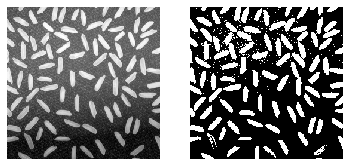

In [5]:
img = cv2.imread('rice.png', 0)
umbral = 120
output = change_img(img, umbral)

plt.subplot(1,2,1)
show_img(img)
plt.subplot(1,2,2)
show_img(output)
plt.show()

In [0]:
def threshold(img):
  return cv2.threshold(img,0 , 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

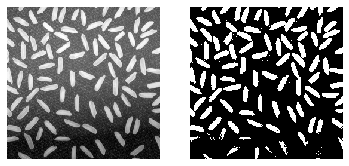

In [7]:
ret, thres = threshold(img)
plt.subplot(1,2,1)
show_img(img)
plt.subplot(1,2,2)
show_img(thres)
plt.show()

In [0]:
def dilatacion(img):
  new_img = np.zeros((img.shape[0] + 2, img.shape[1] + 2), dtype = np.uint8)
  new_img[1:img.shape[0] + 1, 1 : img.shape[1] + 1] = img

  output = np.zeros_like(new_img)

  for i in range(1, new_img.shape[0] - 1):
    for j in range(1, new_img.shape[1] - 1):
      if(new_img[i, j] == 255):
        output[i , j] = output[i, j - 1] = output[i, j + 1] = output[i - 1, j] = output[i + 1, j] = 255
  
  return output[1:img.shape[0] + 1, 1:img.shape[1] + 1]

In [0]:
output = dilatacion(thres)

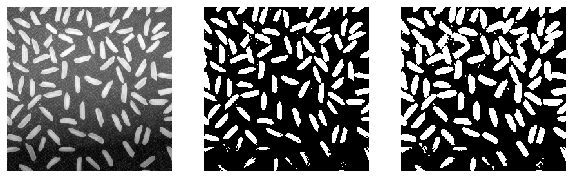

In [10]:
show_3images(img, thres, output)

In [0]:
def erosion(img):
  new_img = np.ones((img.shape[0] + 2, img.shape[1] + 2), dtype = np.uint8)
  new_img[1:img.shape[0] + 1, 1 : img.shape[1] + 1] = img

  output = np.zeros_like(new_img)

  for i in range(1, new_img.shape[0] - 1):
    for j in range(1, new_img.shape[1] - 1):
      if(new_img[i , j] == 255 and new_img[i, j - 1] == 255 and new_img[i, j + 1] == 255 and new_img[i - 1, j] == 255 and new_img[i + 1, j] == 255):
        output[i, j] = 255
  
  return output[1:img.shape[0] + 1, 1:img.shape[1] + 1]

In [0]:
output = erosion(thres)

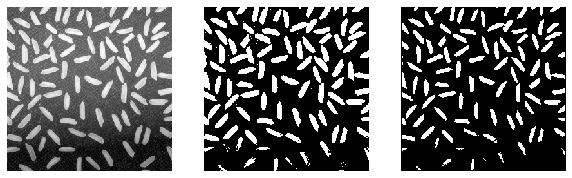

In [13]:
show_3images(img, thres , output)

In [0]:
def apertura(img): #delete noise
  output = erosion(thres)
  return dilatacion(output)

In [0]:
def cierre(img): #close holes
  output = dilatacion(thres)
  return erosion(output)

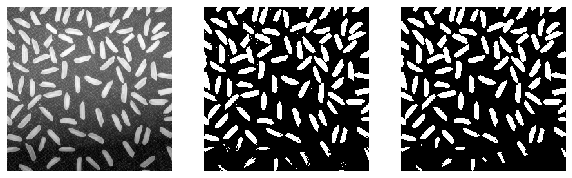

In [16]:
output = apertura(thres)
show_3images(img, thres, output)

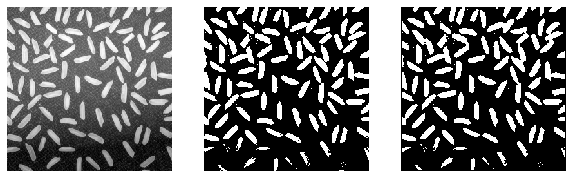

In [17]:
output = cierre(thres)
show_3images(img, thres, output)